# Inspector de integridad de latas Utilizando Deep learning
En el marco de la realizacion del curso prediccion por medio de imagenes utilizando deep learning , se realiza un prototipo de clasificacion, dicho prototipo fue entrenado utilizando imagenes adquiridas en la empresa que trabajo actualmente conocida como INTECOL SAS , el objetivo del proyecto es clasificar latas buenas y latas malas, Intecol realizo una arquitectura compuesta por iluminacion , 4 camaras adecuadas y un sistema expulsor:
#### Sistema optico utilizado
<img src="images/iluminacion.png" alt="" style="height:400px"></img> 

las imagenes adquiridas por el sistema se pueden observar a continuacion:

##### Imagen buena
<img src="images/_OK.png" alt="" style="height:200px"></img>

##### Imagen Mala
<img src="images/NOTOK.png" alt="" style="height:200px"></img>



Actualmente el sistema utiliza un algoritmo de vision artificial que funciona con operaciones basicas de imagenes, tales como threshold , filtros , adquisicion de caracteristicas tales como area , angulo , en donde se analiza cada una de las lineas que se ven en las latas , y  con condicionales se logra clasificar la lata como buena/mala .

El proyecto pretende utilizar dichos algoritmos para generar un dataset de mas de 20000 imagenes para llevar a cabo la
clasificacion de las imagenes mediante uso de deep learning.


Se utilizaron diferentes modelos, tanto propios como modelos descargados para realizar la classificacion, este notebook tiene como fin demostrar los resultados del entrenamiento hecho en los notebook "proyecto_prediccion","deep1" ,"deep2" y "deep3" se realizaron varios entrenamientos, los modelos con los pesos entrenados se encuentran guardados en la carpeta "models", este notebook muestra el desempeño de uno de esos modelos.

In [ ]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd 
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import math
import PIL
from keras.preprocessing import image
import glob
%matplotlib inline

In [2]:
base_dir = 'dataset/all_cameras_splitted'
test_dir =  os.path.join(base_dir, 'test')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'Val')

# Directory with our training pictures
train_OK_dir = os.path.join(train_dir, 'OK')
train_NOT_OK_dir = os.path.join(train_dir, 'NOT_OK')

# Directory with our validation pictures
validation_OK_dir = os.path.join(validation_dir, 'OK')
validation_NOT_OK_dir = os.path.join(validation_dir, 'NOT_OK')
train_OK_fnames = os.listdir( train_OK_dir )
train_NOT_OK_fnames = os.listdir( train_NOT_OK_dir )

 se utiliza la libreria ImageDataGenerator para cargar el dataset  y aplicar normalizacion a las imagenes (y si se requiere data augmentation)

In [19]:
with tf.device('/cpu:0'):
    # All images will be rescaled by 1./255.
    train_datagen = ImageDataGenerator(
          rescale=1/255,
    #       rotation_range=40,
    #       width_shift_range=0.2,
    #       height_shift_range=0.2,
    #       fill_mode='nearest',
    #       shear_range=0.2,
    #       zoom_range=0.2,
    #       horizontal_flip=True
    )

    val_datagen = ImageDataGenerator(rescale=1/255)
    train_generator = train_datagen.flow_from_directory(
            train_dir,  # This is the source directory for training images

            ### En esta linea de codigo se cambia el tamaño de la imagen

            target_size=(256, 256),  # All images will be resized 

            ####

            batch_size=64,
            # Since we use binary_crossentropy loss, we need binary labels
            class_mode='binary')
    # Flow training images in batches of 128 using train_datagen generator
    validation_generator = val_datagen.flow_from_directory(
            validation_dir,  # This is the source directory for training images

            ##Tamaño de imagen del validation dataset


            target_size=(256, 256),  # All images will be resized 
            ###


            batch_size=64,
            # Since we use binary_crossentropy loss, we need binary labels
            class_mode='binary')

Found 16761 images belonging to 2 classes.
Found 3351 images belonging to 2 classes.


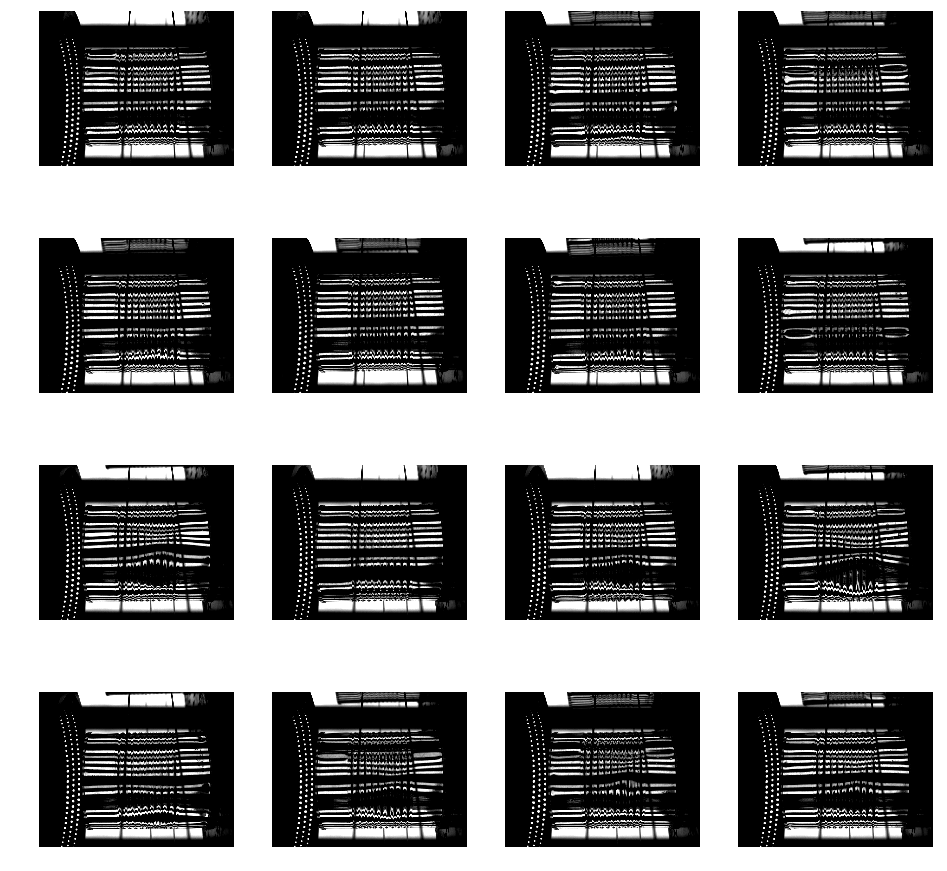

In [109]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 20 # Index for iterating over images
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_OK_pix = [os.path.join(train_OK_dir, fname) 
                for fname in train_OK_fnames[ pic_index-8:pic_index] 
               ]

next_NOT_OK_pix = [os.path.join(train_NOT_OK_dir, fname) 
                for fname in train_NOT_OK_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_OK_pix+next_NOT_OK_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
#   print(img.shape)  
  plt.imshow(img, 'gray')

## Carga del modelo:


In [20]:
with tf.device('/cpu:0'):
    path = '10-improvement-epoch-50.h5'
    model = load_model('saved_models/'+path)
    model.compile(optimizer= 'adam',loss = 'binary_crossentropy',metrics= ['accuracy'])

In [21]:
# path = 'model_continue.h5'

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 256)       2

# Evaluacion

In [64]:
loss,acc = model.evaluate(validation_generator)
print("restored model , accuracy in the test set :  ",acc)

53/53 [==============================] - 173s 3s/step - loss: 0.0280 - accuracy: 0.9991
restored model , accuracy in the test set :   0.9991047382354736


In [67]:
with tf.device('/cpu:0'):

#      y_train = model.predict(train_generator)
    
    y_train = model.predict(train_generator, steps=train_generator.samples/train_generator.batch_size,verbose=1)
    y_val = model.predict(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)

52/52 [==============================] - 187s 4s/step


In [89]:
threshold= 0.5
ground_truth_val = validation_generator.classes
ground_truth_train = train_generator.classes

# threshold = 0.2
predicted_classes_val = tf.where(y_val<=threshold,0,1)
predicted_classes_train = tf.where(y_train<=threshold,0,1)


cm_val = confusion_matrix(ground_truth_val,predicted_classes_val)
cm_train = confusion_matrix(ground_truth_train,predicted_classes_train)
print('Validation Confusion Matrix : \n', cm_val)
print('Train Confusion Matrix : \n', cm_train)
total_val=sum(sum(cm_val))
total_train=sum(sum(cm_train))
print('model :',path)
print('True positives validation: ',cm_val[0,0])
print('True positives train: ',cm_train[0,0])
print('False positives validation: ',cm_val[0,1])
print('False positives train: ',cm_train[0,1])
print('False Negatives validation: ',cm_val[1,0])
print('False Negatives train: ',cm_train[1,0])
print('True Negatives validation: ',cm_val[1,1])
print('True Negatives train: ',cm_train[1,1])
#####from confusion matrix calculate accuracy
accuracy_val=(cm_val[0,0]+cm_val[1,1])/total_val
print ('Validation Accuracy : ', accuracy_val)

accuracy_train=(cm_train[0,0]+cm_train[1,1])/total_train
print ('Train Accuracy : ', accuracy_train)

sensitivity_val = cm_val[0,0]/(cm_val[0,0]+cm_val[0,1])
print('Validation Sensitivity : ', sensitivity_val )

sensitivity_train = cm_train[0,0]/(cm_train[0,0]+cm_train[0,1])
print('Train Sensitivity : ', sensitivity_train )

specificity_val = cm_val[1,1]/(cm_val[1,0]+cm_val[1,1])
print('Validation Specificity : ', specificity_val)

specificity_train = cm_train[1,1]/(cm_train[1,0]+cm_train[1,1])
print('Train Specificity : ', specificity_train)
errores_val = cm_val[1,0]+cm_val[0,1]
errores_train=cm_train[1,0]+cm_train[0,1]
print('Number of validation error: ', errores_val)
print('Number of validation error: ', errores_train)

Validation Confusion Matrix : 
 [[ 397  765]
 [ 766 1423]]
Train Confusion Matrix : 
 [[2000 3820]
 [3802 7139]]
model : 10-improvement-epoch-50.h5
True positives validation:  397
True positives train:  2000
False positives validation:  765
False positives train:  3820
False Negatives validation:  766
False Negatives train:  3802
True Negatives validation:  1423
True Negatives train:  7139
Validation Accuracy :  0.5431214562817069
Train Accuracy :  0.5452538631346578
Validation Sensitivity :  0.34165232358003444
Train Sensitivity :  0.3436426116838488
Validation Specificity :  0.6500685244403838
Train Specificity :  0.6524997715016909
Number of validation error:  1531
Number of validation error:  7622


## Evaluacion de una imagen

0.15205097198486328
[[1.]]
OK


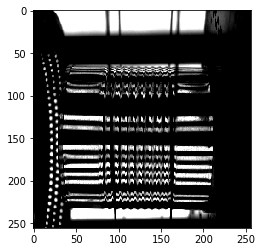

In [91]:
with tf.device('/cpu:0'):
    impath='dataset/cam2/OK/imagen_2020_12_28_1348_0533.png' 
    img=image.load_img(impath, target_size=(256, 256))
    plt.imshow(img)  
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])
    import time

    start = time.time()


    classes = model.predict(images, batch_size=10)
    end = time.time()
    proc_time = end - start
    print(proc_time)
    print(classes)
    if classes[0]>0.6:
        print( "OK")

    else:
        print( " NOT OK")

# Evaluacion de  todas las imagenes que son etiquetadas como OK, se muestran las que el algoritmo detecta como NOT_OK

NOK


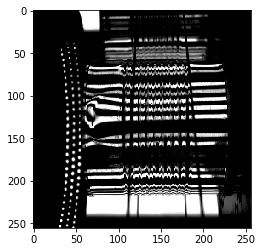

NOK


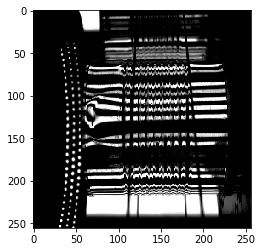

NOK


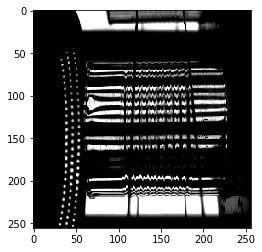

NOK


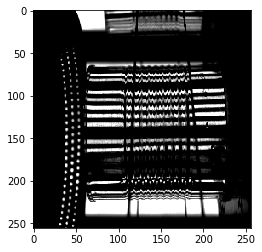

NOK


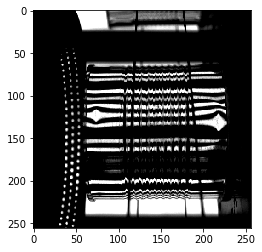

NOK


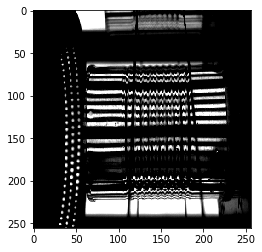

NOK


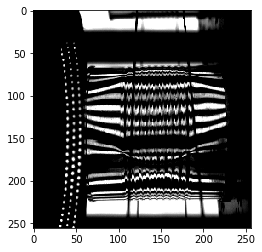

NOK


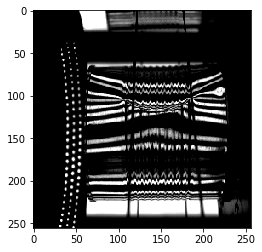

NOK


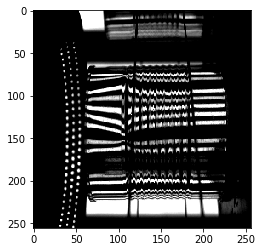

NOK


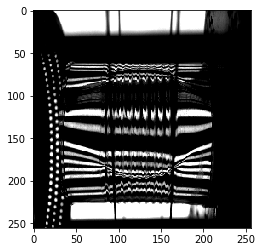

NOK


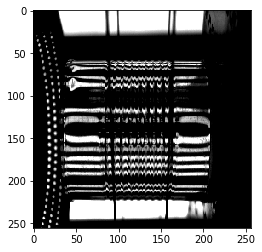

NOK


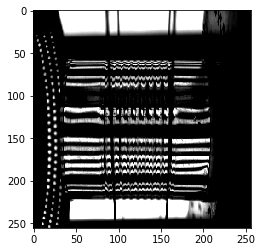

NOK


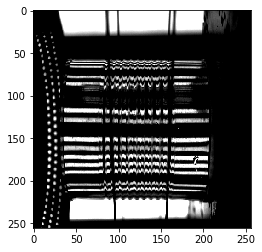

NOK


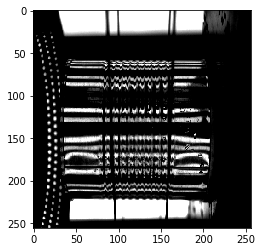

NOK


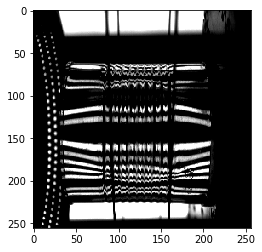

NOK


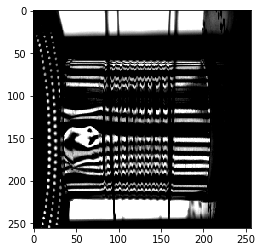

NOK


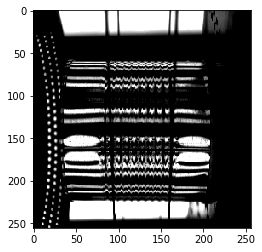

NOK


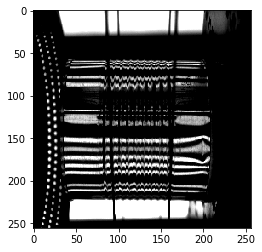

NOK


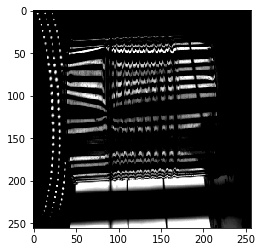

NOK


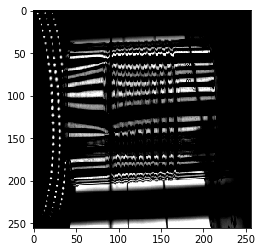

NOK


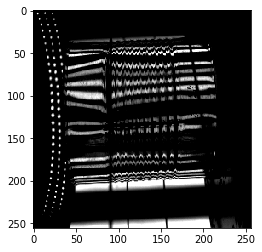

NOK


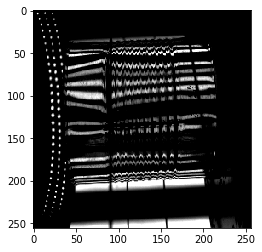

NOK


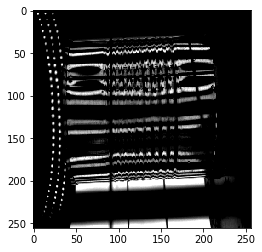

NOK


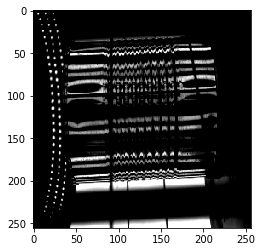

NOK


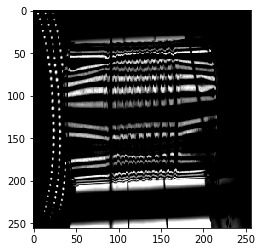

NOK


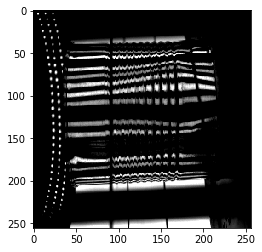

NOK


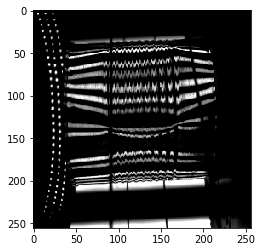

NOK


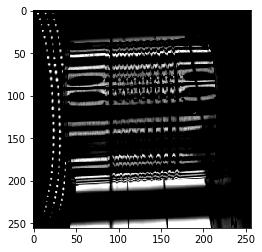

NOK


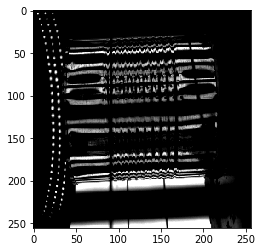

NOK


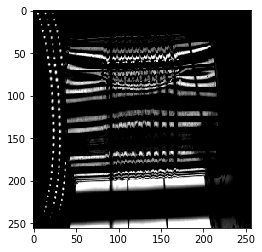

NOK


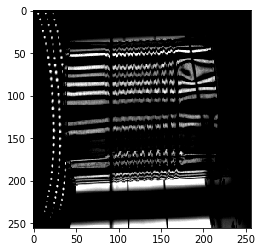

NOK


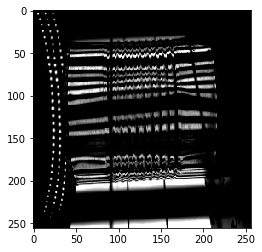

NOK


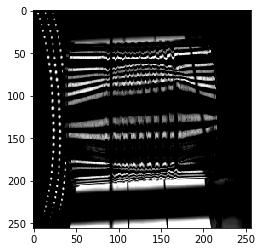

NOK


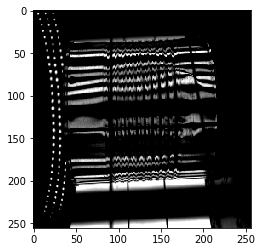

NOK


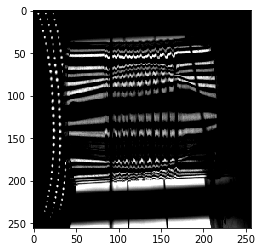

NOK


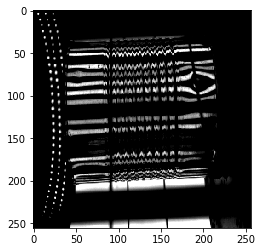

NOK


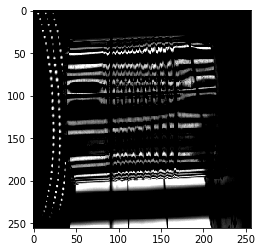

NOK


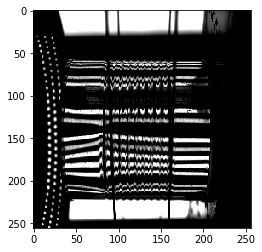

NOK


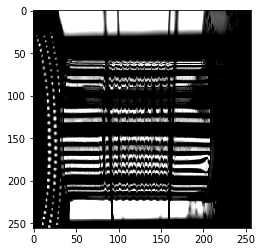

NOK


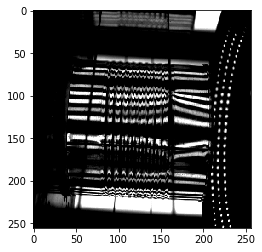

NOK


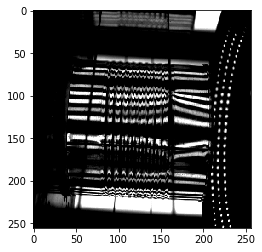

NOK


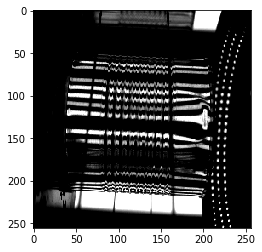

NOK


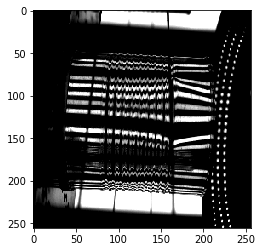

NOK


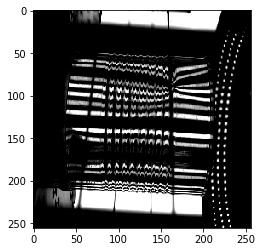

NOK


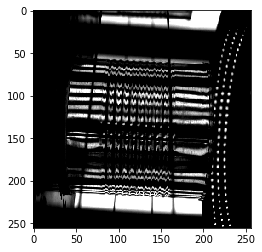

NOK


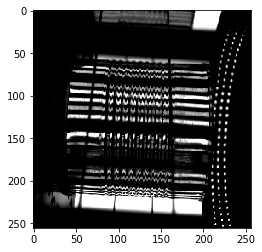

NOK


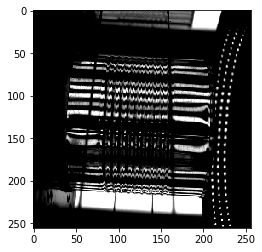

NOK


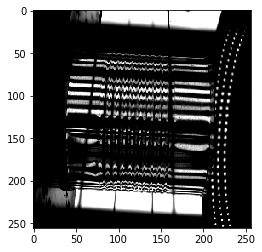

NOK


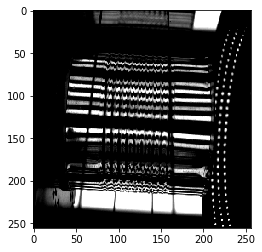

NOK


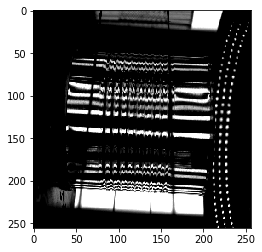

NOK


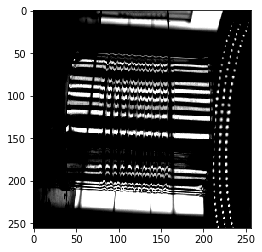

NOK


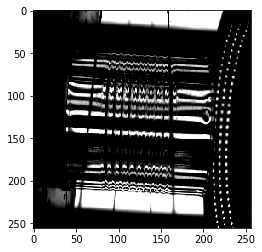

NOK


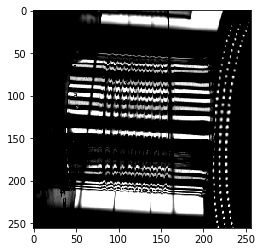

NOK


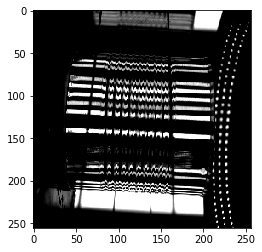

NOK


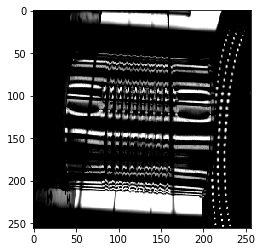

NOK


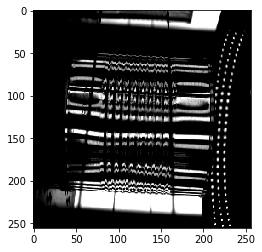

NOK


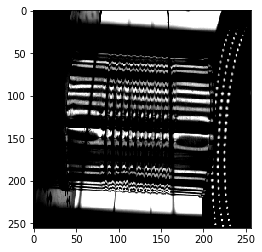

NOK


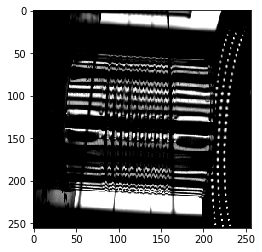

NOK


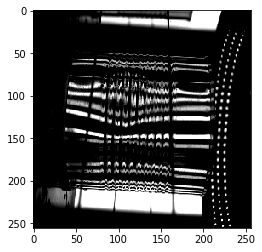

NOK


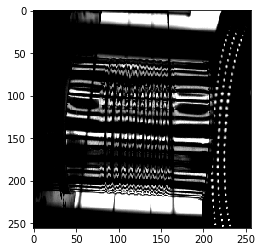

NOK


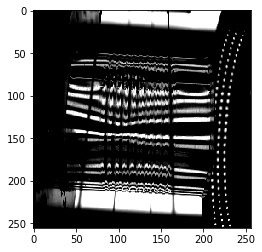

NOK


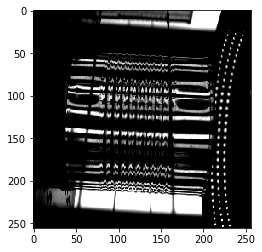

NOK


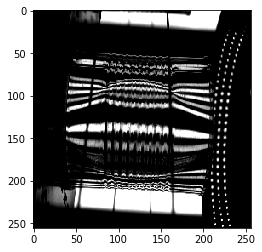

NOK


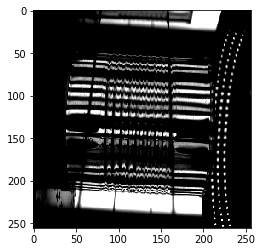

NOK


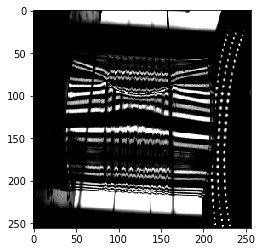

NOK


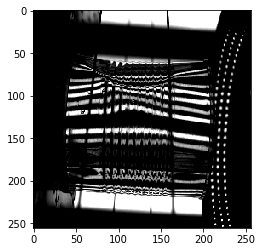

NOK


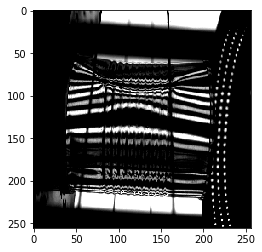

NOK


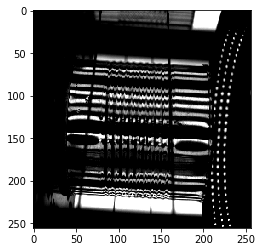

NOK


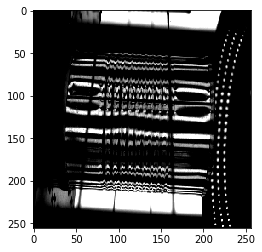

NOK


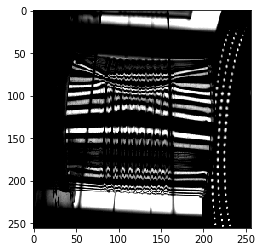

NOK


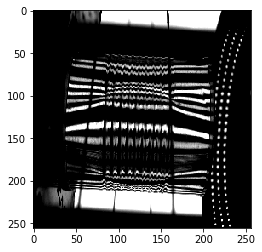

NOK


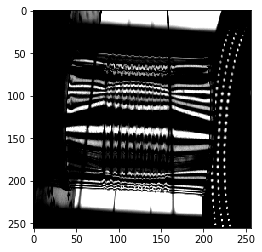

NOK


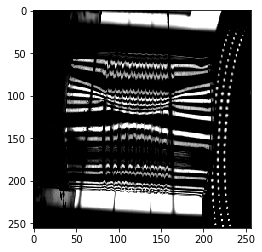

NOK


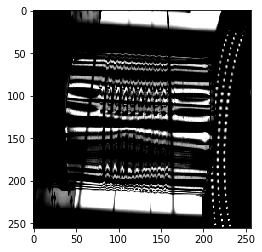

NOK


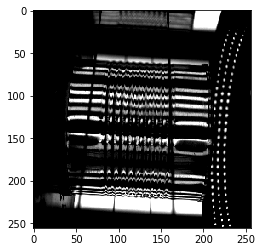

NOK


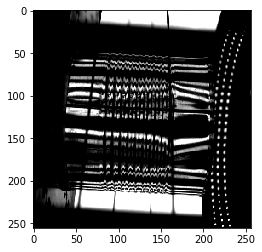

NOK


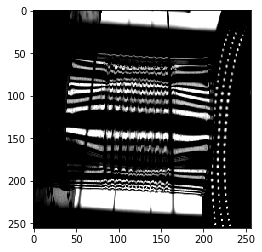

NOK


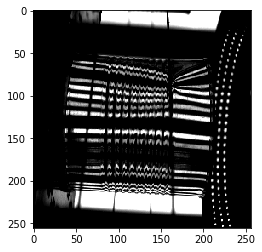

NOK


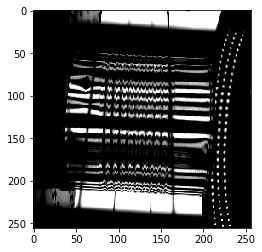

NOK


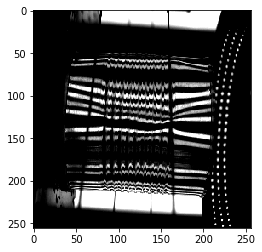

NOK


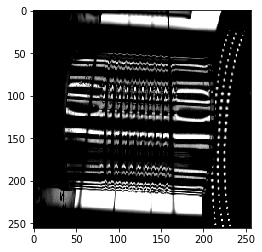

NOK


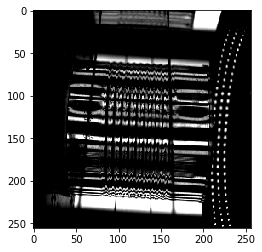

NOK


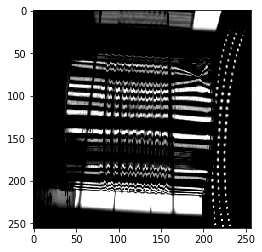

NOK


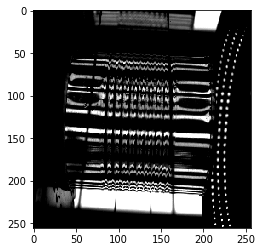

NOK


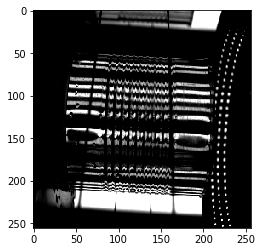

NOK


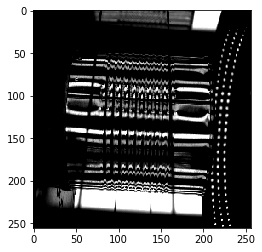

NOK


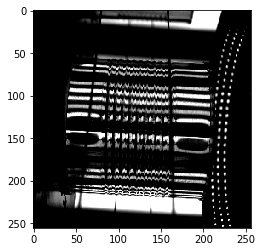

NOK


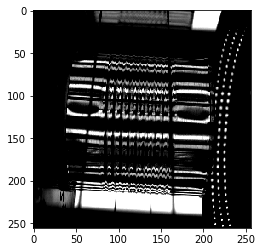

NOK


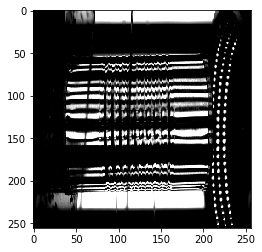

NOK


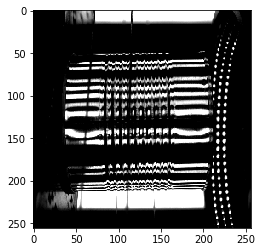

NOK


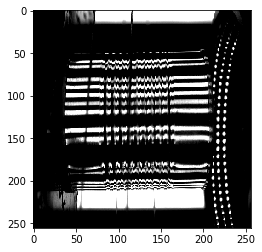

NOK


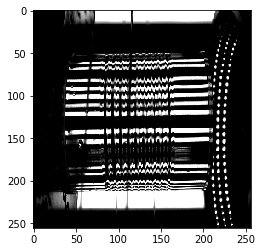

NOK


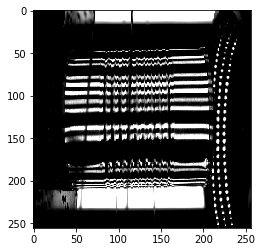

NOK


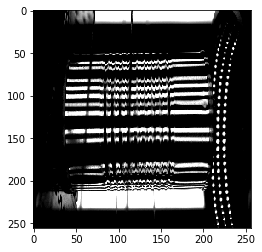

NOK


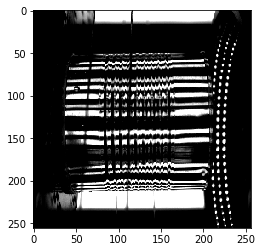

NOK


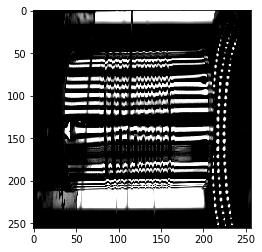

NOK


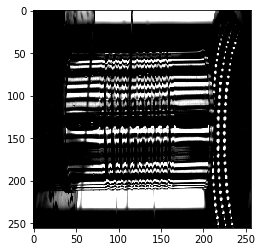

NOK


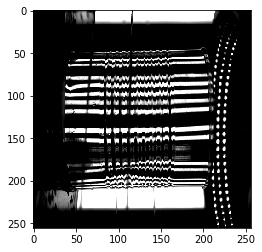

NOK


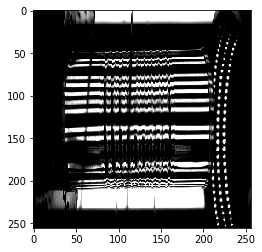

NOK


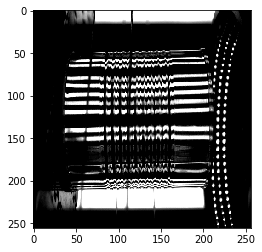

NOK


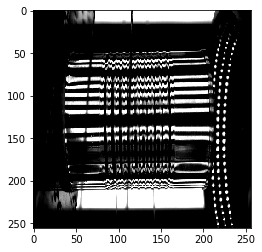

NOK


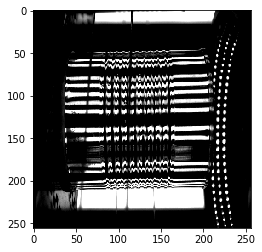

NOK


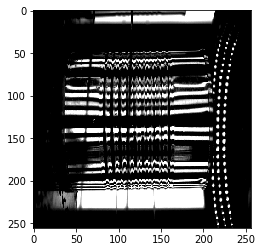

NOK


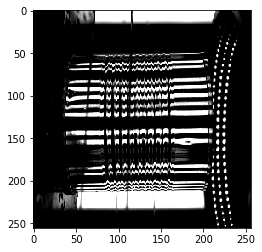

NOK


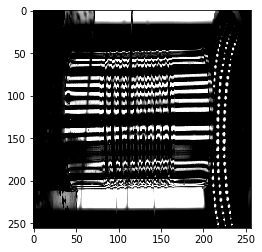

NOK


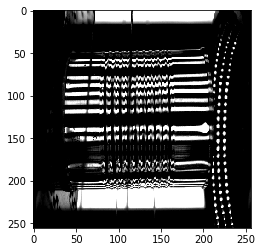

NOK


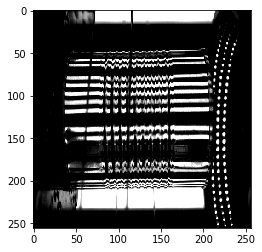

NOK


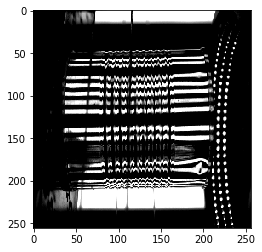

NOK


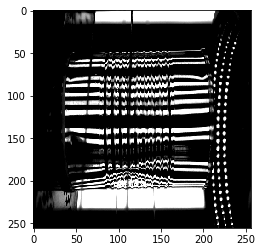

NOK


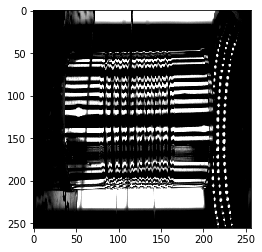

NOK


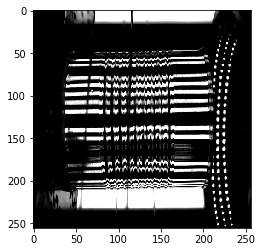

NOK


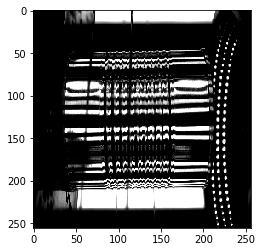

NOK


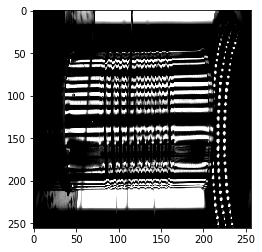

NOK


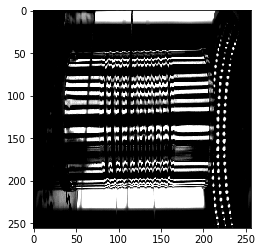

NOK


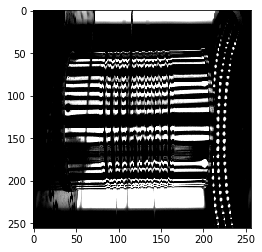

NOK


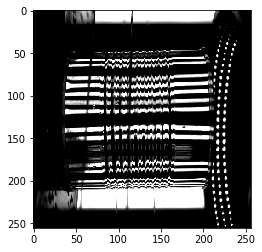

NOK


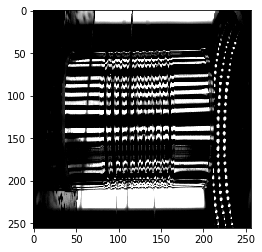

NOK


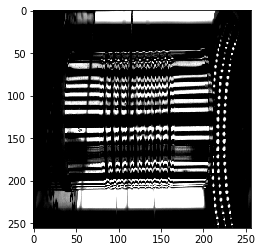

NOK


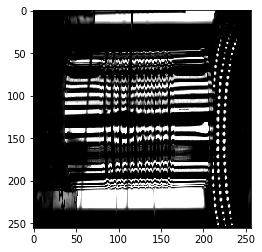

NOK


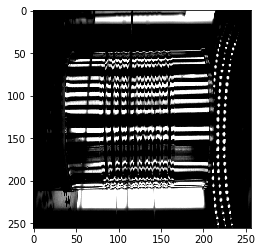

NOK


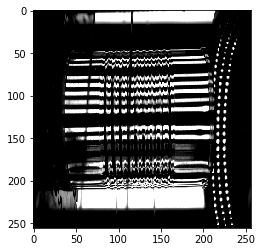

NOK


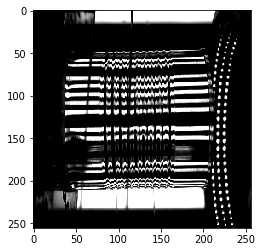

NOK


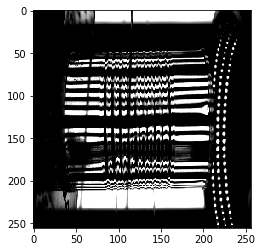

NOK


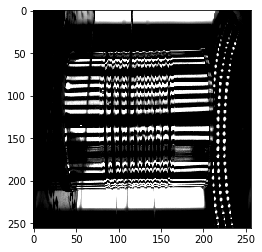

NOK


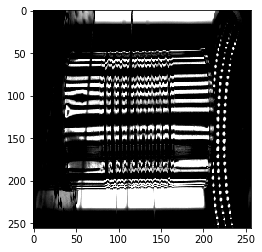

NOK


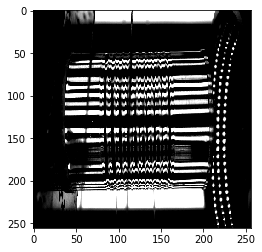

NOK


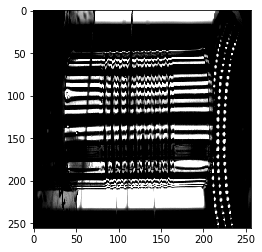

NOK


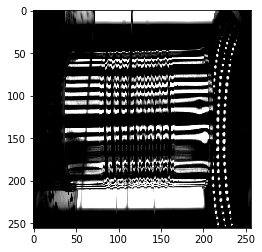

NOK


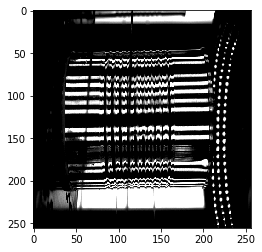

NOK


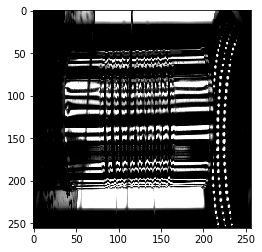

De  1461  Imagenes,  130 Imagenes son incorrectas


In [106]:
with tf.device('/cpu:0'):
    cont = 0
    cont2 = 0
    for i,filename in enumerate(glob.glob("dataset/all_cameras_splitted/test/OK/*.png"), 1):
        img=image.load_img(filename, target_size=(256, 256))
    #     plt.figure()
        

        x=image.img_to_array(img)
        x=np.expand_dims(x, axis=0)
        images = np.vstack([x])
        cont = cont + 1
        classes = model.predict(images, batch_size=10)
#         print(classes[0])
        if classes[0]<0.6:
            cont2 =cont2 + 1
    #         plt.axis('off')
    #         plt.grid(b=None)
    #         plt.figure(figsize=((10,10)))
    # #         plt.subplot(300, 4, i+1)
            print('NOK')
            plt.imshow(img)
            plt.show()
    print('De ', cont,' Imagenes, ',cont2, 'Imagenes son incorrectas')

## Evaluacion de las imagenes etiquetadas como NOT_OK , Se muestran las que el modelo detecta como OK

OK


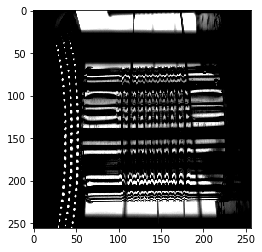

OK


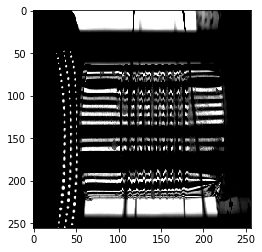

OK


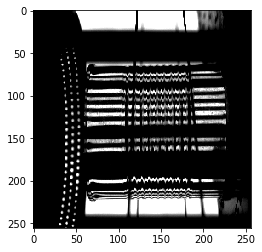

OK


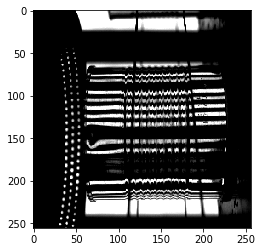

OK


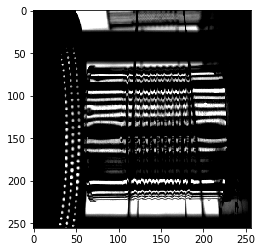

OK


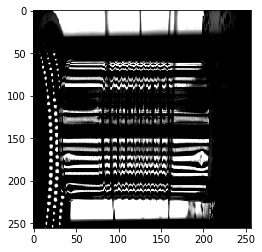

OK


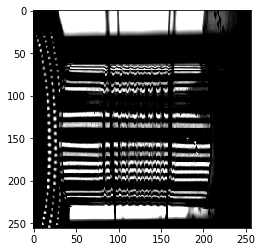

OK


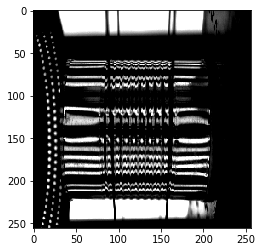

OK


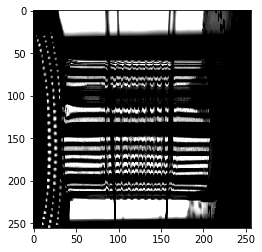

OK


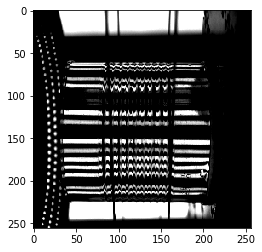

OK


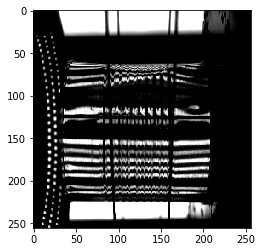

OK


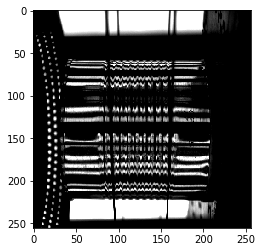

OK


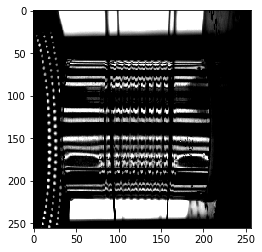

OK


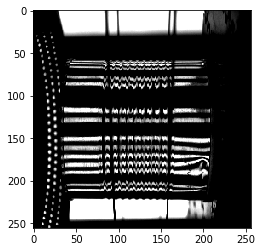

OK


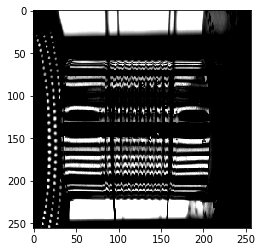

OK


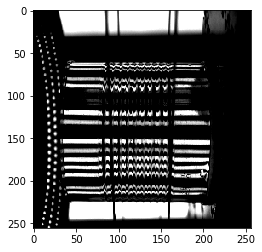

OK


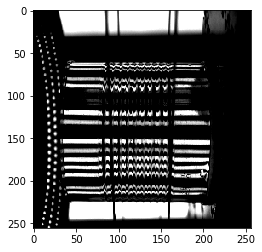

OK


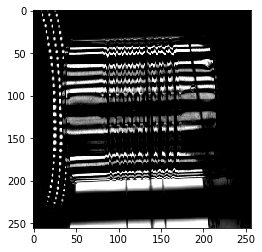

OK


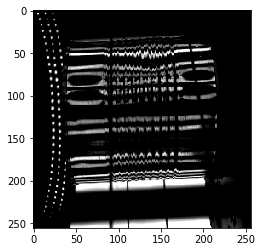

OK


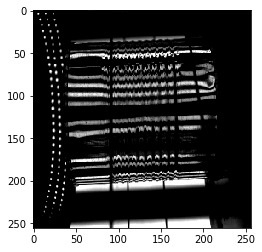

OK


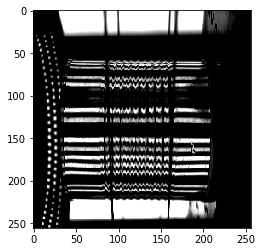

OK


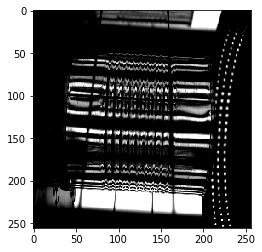

OK


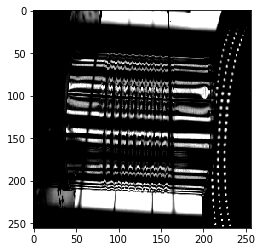

OK


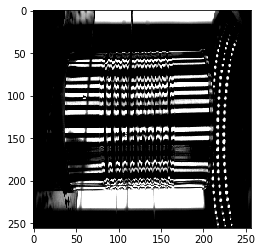

De  776  Imagenes,  24 Imagenes son incorrectas


In [107]:
with tf.device('/cpu:0'):
    cont = 0
    cont2 = 0
    for i,filename in enumerate(glob.glob("dataset/all_cameras_splitted/test/NOT_OK/*.png"), 1):
        img=image.load_img(filename, target_size=(256, 256))
    #     plt.figure()


        x=image.img_to_array(img)
        x=np.expand_dims(x, axis=0)
        images = np.vstack([x])

        classes = model.predict(images, batch_size=10)
        cont =cont + 1
#         print(classes[0])
        if classes[0]>0.6:
    #         plt.axis('off')
    #         plt.grid(b=None)
    #         plt.figure(figsize=((10,10)))
    # #         plt.subplot(300, 4, i+1)
            cont2=cont2+ 1
            
            print('OK')
            plt.imshow(img)
            plt.show()
    print('De ', cont,' Imagenes, ',cont2, 'Imagenes son incorrectas')

## Conclusiones
### Es importante notar que muchas de las imagenes en las que el modelo se equivoca, realmente no fue el modelo el que se equivoco, fue un mal etiquetado, producto de los anteriores algoritmos. Por ende el profundizaje profundo demuestra ser una herramienta poderosa para la dereccion latas dañadas e inclulsive puede llegar a ser superior a los algoritmos anteriormente utilizados.

### El modelo se comporta de una manera buena, sin embargo hace falta recolectar mayor cantidad de imagenes y realizar una limpieza adecuada a los etiquetados de las imagenes para poder mejorar los algoritmos y lograr una presicion mayor.

### Se evaluaron modelos pre-entrenados tales como Mobilenet,inceptionv3, resnet obteniendo resultados buenos , sin embargo el mejor fue con una arquitectura propuesta por nosotros.

### Cabe notar que el tiempo que demora en realizar una prediccion de imagenes es aproximadamente 150 ms lo cual es un valor bastante llamativo .

### Deep learning demuestra ser una herramienta inclusive mas efectiva que el procesamiento digital de imagenes convencional, sin embargo es dificil saber el "por que" se equivoco en la prediccion, el algoritmo arma sus propias reglas y se vuelve una caja negra , por ende si en algun momento se desea rechazar una lata con un error especifico, toca reentrenar la red y esperar que con las etiquetas adecuadas las reconozca, caso diferente a el procesamiento digital de imagenes convencional en donde uno tiene total control acerca de las caracteristicas que se estan analizando.

### Se debe investigar aun mas modelos, mas arquitecturas y lograr aumentar la precision del modelo


### Analizando la tabla de confusion, se demuestra que el algoritmo es mejor detectando las latas buenas , que las latas malas, esto puede deberse a data imbalanceada, por ello tambien es recomendable aplicar tecnicas para el balanceo adecuado de las clases a analizar.